In [1]:
import sys
# To import python scripts from other folders
sys.path.append('../')
import matplotlib.pyplot as plt
import json
from ProjectTestAnalysis import ProjectTestAnalysis
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import csv
import numpy as np
pd.options.mode.chained_assignment = None
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

In [2]:
many4j_projects = pd.read_csv(results_path+'Many4JResults.csv') 

In [3]:
def getMetrics(project_names):
    df = many4j_projects[many4j_projects['Project'].isin(project_names)]
    s = df.select_dtypes(include=[np.number])*100
    df[s.columns] = s
    return df.round(2)

In [4]:
def generatePlots(project_names):
    for project in project_names:
        pa = ProjectTestAnalysis(project,  2, root=root)
        pa.generateAndSavePlot()

# Set 1

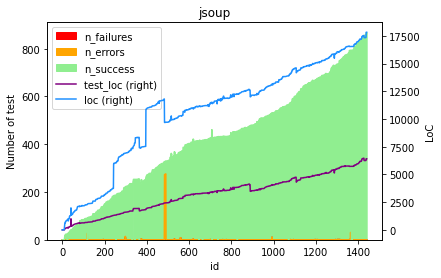

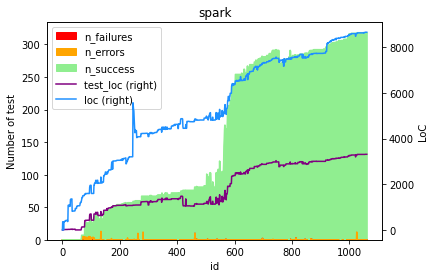

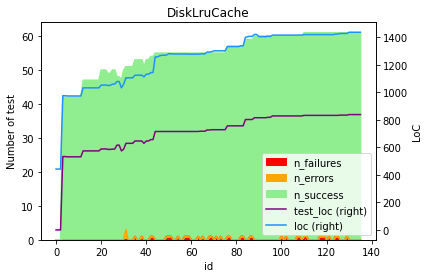

,Project,Source buildability,Test buildability_A,FullyTestability_A
5,jsoup,97.78,97.30,93.55
19,spark,98.96,92.84,86.72
36,DiskLruCache,100.00,97.79,70.59


In [5]:
set1_projects = ["jsoup","spark","DiskLruCache"]
set1 = getMetrics(set1_projects, )
generatePlots(set1_projects)
set1[['Project','Source buildability','Test buildability_A','FullyTestability_A']]

# Set 2

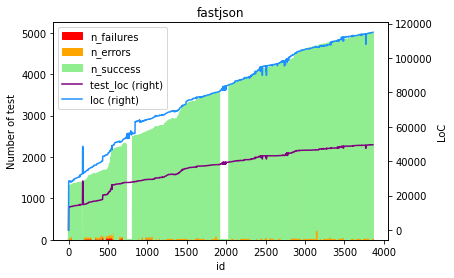

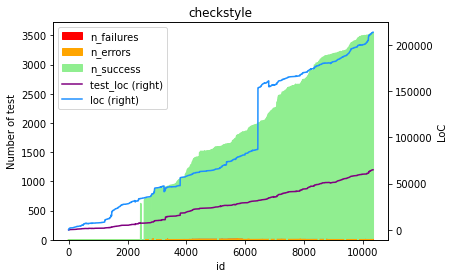

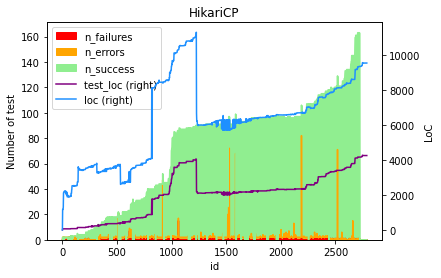

In [6]:
set2_projects = ["fastjson","checkstyle","HikariCP"]
set2 = getMetrics(set2_projects)
generatePlots(set2_projects)

In [7]:
set2[['Project','Source buildability','Test buildability_A','FullyTestability_A']]

,Project,Source buildability,Test buildability_A,FullyTestability_A
39,HikariCP,96.02,95.23,16.93
50,checkstyle,77.72,74.35,0.78
61,fastjson,94.25,88.35,0.00


In [8]:
set2[['Project','Source buildability','Test buildability_A','FullyTestability_A', 'TestabilityRate_A','TestabilityRate_A_std']]

,Project,Source buildability,Test buildability_A,FullyTestability_A,TestabilityRate_A,TestabilityRate_A_std
39,HikariCP,96.02,95.23,16.93,88.76,26.41
50,checkstyle,77.72,74.35,0.78,74.23,43.60
61,fastjson,94.25,88.35,0.00,87.81,31.90


# Set 3

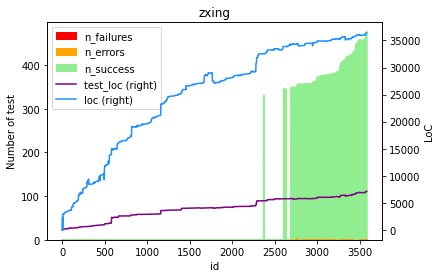

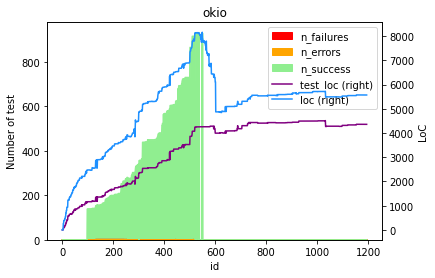

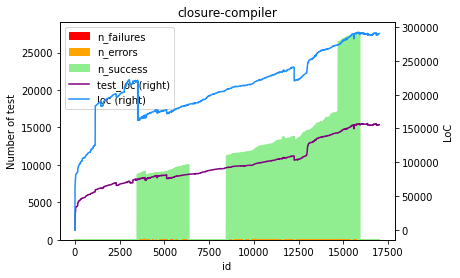

In [9]:
set3_projects = ["zxing","okio","closure-compiler"]
set3 = getMetrics(set3_projects)
generatePlots(set3_projects)

In [10]:
set3[['Project','Source buildability','Test buildability_A','FullyTestability_A', 'TestabilityRate_A']]

,Project,Source buildability,Test buildability_A,FullyTestability_A,TestabilityRate_A
12,okio,36.65,36.07,26.28,36.02
51,closure-compiler,60.18,59.84,55.82,59.84
65,zxing,25.47,25.39,24.80,25.39


In [11]:
set3[['Project','Source buildability','Test buildability_A','Test buildability_S','FullyTestability_A', 'TestabilityRate_A']]

,Project,Source buildability,Test buildability_A,Test buildability_S,FullyTestability_A,TestabilityRate_A
12,okio,36.65,36.07,98.40,26.28,36.02
51,closure-compiler,60.18,59.84,99.43,55.82,59.84
65,zxing,25.47,25.39,99.67,24.80,25.39


In [12]:
set3[['Project','Source buildability','Test buildability_A','Test buildability_S','FullyTestability_A', 'FullyTestability_T', 'TestabilityRate_A', 'TestabilityRate_T', 'TestabilityRate_A_std', 'TestabilityRate_T_std']]

,Project,Source buildability,Test buildability_A,Test buildability_S,FullyTestability_A,FullyTestability_T,TestabilityRate_A,TestabilityRate_T,TestabilityRate_A_std,TestabilityRate_T_std
12,okio,36.65,36.07,98.40,26.28,72.85,36.02,99.86,47.97,0.24
51,closure-compiler,60.18,59.84,99.43,55.82,93.27,59.84,99.99,49.02,0.07
65,zxing,25.47,25.39,99.67,24.80,97.69,25.39,100.00,43.53,0.04


# All sets

In [13]:
all_sets_projects = ["jsoup","spark","DiskLruCache","fastjson","checkstyle","HikariCP","zxing","okio","closure-compiler"]
all_sets = getMetrics(all_sets_projects)
all_sets[['Project','Test buildability_A','Test buildability_S','FullyTestability_A', 'FullyTestability_T', 'TestabilityRate_A', 'TestabilityRate_T']]

,Project,Test buildability_A,Test buildability_S,FullyTestability_A,FullyTestability_T,TestabilityRate_A,TestabilityRate_T
5,jsoup,97.30,99.50,93.55,96.15,96.84,99.53
12,okio,36.07,98.40,26.28,72.85,36.02,99.86
19,spark,92.84,93.82,86.72,93.41,92.15,99.25
36,DiskLruCache,97.79,97.79,70.59,72.18,97.29,99.48
39,HikariCP,95.23,99.18,16.93,17.78,88.76,93.21
50,checkstyle,74.35,95.67,0.78,1.05,74.23,99.84
51,closure-compiler,59.84,99.43,55.82,93.27,59.84,99.99
61,fastjson,88.35,93.74,0.00,0.00,87.81,99.39
65,zxing,25.39,99.67,24.80,97.69,25.39,100.00
